In [332]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data
#city_data_to_load.head() #120 city driver_count type
#ride_data_to_load.head() #2375 city date fare ride_id
 
# Combine the data into a single dataset
combined_df = pd.merge(ride_data_to_load, city_data_to_load, how="outer", on="city")

# Display the data table for preview
#combined_df.sort_values(by=["date"]).head()
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [333]:
combined_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [334]:
combined_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

## Bubble Plot of Ride Sharing Data

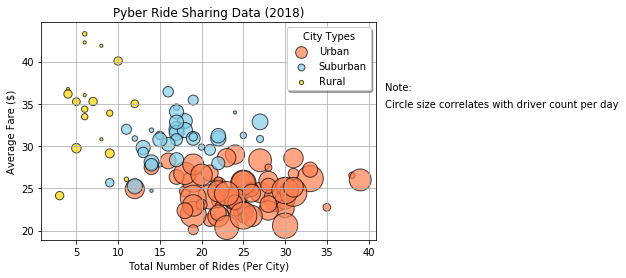

In [344]:
# Obtain the x and y coordinates for each of the three city types
combined_df_urban = combined_df.loc[combined_df["type"] == "Urban"]
average_fare_urban = combined_df_urban.groupby(["city"]).mean()["fare"] #y-axis
num_rides_city_urban = combined_df_urban.groupby(["city"]).count()["ride_id"] #x-axis
driver_count_urban = combined_df_urban.groupby(["city"]).mean()["driver_count"]*10 #bubble size

combined_df_suburban = combined_df.loc[combined_df["type"] == "Suburban"]
average_fare_suburban = combined_df_suburban.groupby(["city"]).mean()["fare"] #y-axis
num_rides_city_suburban = combined_df_suburban.groupby(["city"]).count()["ride_id"] #x-axis
driver_count_suburban = combined_df_suburban.groupby(["city"]).mean()["driver_count"]*10 #bubble size

combined_df_rural = combined_df.loc[combined_df["type"] == "Rural"]
average_fare_rural = combined_df_rural.groupby(["city"]).mean()["fare"] #y-axis
num_rides_city_rural = combined_df_rural.groupby(["city"]).count()["ride_id"] #x-axis
driver_count_rural = combined_df_rural.groupby(["city"]).mean()["driver_count"]*10 #bubble size



plt.scatter(x=num_rides_city_urban, y=average_fare_urban, s=driver_count_urban, \
            alpha=0.7, edgecolors="black", facecolors="coral", label='Urban')

plt.scatter(x=num_rides_city_suburban, y=average_fare_suburban, s=driver_count_suburban, \
            alpha=0.7, edgecolors="black", facecolor='skyblue', label='Suburban')

plt.scatter(x=num_rides_city_rural, y=average_fare_rural, s=driver_count_rural, \
            alpha=0.7, edgecolors="black", facecolor='gold', label='Rural')


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, markerscale=0.6, title="City Types")

# Incorporate a text label regarding circle size
plt.text(42, 37, "Note: ", horizontalalignment='left',verticalalignment='center')
plt.text(42, 35, "Circle size correlates with driver count per day", horizontalalignment='left',verticalalignment='center')
# Save Figure
plt.savefig("../Images/PyberRideSharingData.png")
plt.show()

In [336]:
# Show plot
plt.show()

## Total Fares by City Type

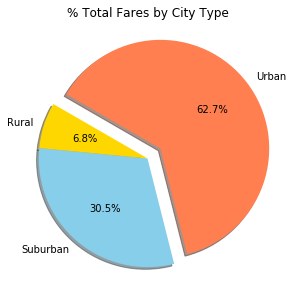

In [350]:
# Calculate Type Percents
total_urban = combined_df["fare"].loc[combined_df["type"] == "Urban"].sum()
total_suburban = combined_df["fare"].loc[combined_df["type"] == "Suburban"].sum()
total_rural = combined_df["fare"].loc[combined_df["type"] == "Rural"].sum()

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [total_urban, total_suburban, total_rural]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.15, 0, 0)

plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", \
        shadow=True, startangle=150, counterclock=False)
plt.title("% Total Fares by City Type")

# Save Figure
plt.savefig("../Images/Total_Fares_Type_Pies.png")

In [338]:
# Show Figure
plt.show()

## Total Rides by City Type

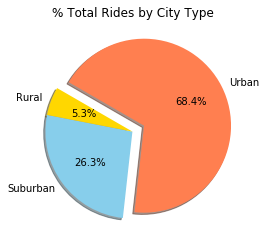

In [351]:
# Calculate Ride Percents
rides_urban = combined_df["ride_id"].loc[combined_df["type"] == "Urban"].count()
rides_suburban = combined_df["ride_id"].loc[combined_df["type"] == "Suburban"].count()
rides_rural = combined_df["ride_id"].loc[combined_df["type"] == "Rural"].count()

# Build Pie Chart

# Calculate Type Percents

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [rides_urban, rides_suburban, rides_rural]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.15, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", \
        shadow=True, startangle=150, counterclock=False)
plt.title("% Total Rides by City Type")

# Save Figure
plt.savefig("../Images/Total_Rides_Type_Pies.png")

In [340]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [341]:
driver_urban = combined_df["driver_count"].loc[combined_df["type"] == "Urban"].unique()
driver_urban
driver_suburban = combined_df["driver_count"].loc[combined_df["type"] == "Suburban"].unique()
driver_suburban
driver_rural = combined_df["driver_count"].loc[combined_df["type"] == "Rural"].unique()
driver_rural

array([9, 8, 6, 2, 1, 7, 4], dtype=int64)

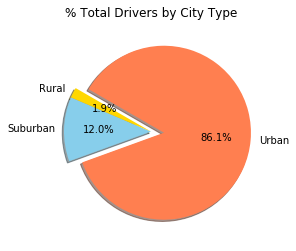

In [352]:
# Calculate Driver Percents
driver_urban = combined_df["driver_count"].loc[combined_df["type"] == "Urban"].unique().sum()
driver_suburban = combined_df["driver_count"].loc[combined_df["type"] == "Suburban"].unique().sum()
driver_rural = combined_df["driver_count"].loc[combined_df["type"] == "Rural"].unique().sum()

# Build Pie Chart

# Calculate Type Percents

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [driver_urban, driver_suburban, driver_rural]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.15, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", \
        shadow=True, startangle=150, counterclock=False)
plt.title("% Total Drivers by City Type")

#plt.set_aspect(aspect = "auto")
# Save Figure
plt.savefig("../Images/Total_Drivers_Type_Pies.png")

In [343]:
# Show Figure
plt.show()